In [18]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
# importing required libraries 
import dash 
import dash_core_components as dcc     
import dash_html_components as html 
import pandas as pd

In [20]:
solar_capability = pd.read_csv("installed-solar-pv-capacity.csv")
solar_consumtion = pd.read_csv("solar-energy-consumption.csv")

In [21]:
solar_capability = solar_capability.rename(columns={'Solar energy capacity - GW': 'capability_gw'})
solar_capability = solar_capability.loc[solar_capability['Entity'].isin(["Vietnam", "Australia", "Japan", "Singapore"])] ## FILTER
solar_capability


,Entity,Code,Year,capability_gw
262,Australia,AUS,2000,0.025000
263,Australia,AUS,2001,0.029000
264,Australia,AUS,2002,0.034000
265,Australia,AUS,2003,0.039400
266,Australia,AUS,2004,0.046400
...,...,...,...,...
4197,Vietnam,VNM,2018,0.104992
4198,Vietnam,VNM,2019,4.993491
4199,Vietnam,VNM,2020,16.660492
4200,Vietnam,VNM,2021,16.660492


In [22]:
# rename column
solar_consumtion = solar_consumtion.rename(columns={'Electricity from solar - TWh': 'from_solar_twh'})  
# select data
solar_consumtion = solar_consumtion.loc[solar_consumtion['Entity'].isin(["Vietnam", "Australia", "Japan", "Singapore"])] ## FILTER
solar_consumtion

environment_concern = pd.read_csv("environmental_concerns.xls")
environment_concern

erka_data = pd.read_excel("eka.xlsx")
erka_data


,Country,Year,Percentage
0,Japan,2000,0.3820
1,Japan,2005,0.3433
2,Japan,2010,0.3552
3,Japan,2015,0.1540
4,Japan,2020,0.2334
5,Japan,2023,0.2970
6,Japan,2035,1.0000
7,Japan,2040,1.0000
8,Australia,2000,0.0809
9,Australia,2005,0.0897


## Public sentiment

In [23]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [24]:
  from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    #note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
    #from vaderSentiment import SentimentIntensityAnalyzer

# --- examples -------
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

In [25]:
sentiment_dataset = pd.read_excel("sentiment.xlsx")
sentiment_dataset.head()

,ID,post_id,time,text,likes,comments,shares,sentiment
0,0,1924048097753160,2021-05-31 16:00:46,We’ve hit a Sydney Metro - NSW GOV milestone: ...,11,1,0,0.000000
1,1,1921019011389402,2021-05-27 12:20:00,Construction safety standards have certainly i...,35,7,0,-0.137383
2,2,1920457328112237,2021-05-27 08:30:00,We’re proud to support National Reconciliation...,17,0,0,0.000000
3,3,1920274138130556,2021-05-26 12:14:56,You can now access Street View imagery of the ...,17,0,0,0.000000
4,4,1918717961619507,2021-05-24 12:30:09,✅ Parramatta ↔️ CBD: 20 minutes\n✅ Blacktown ↔...,49,4,0,0.000000


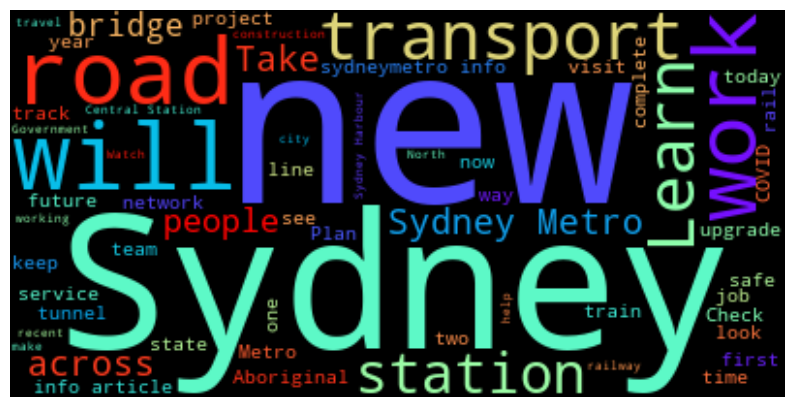

In [186]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# merge all texts in posts
post_text = ' '.join(sentiment_dataset['text'])
post_text = post_text.replace('\n', '') # remove blank lines characters

# update stopwords
stopwords = set(STOPWORDS)
stopwords.update(['https', 'gov', 'au', 'nsw', 's', 're'])

# Generate a word cloud image
wordcloud = WordCloud(random_state=1, 
                      collocations=True, 
                      stopwords=stopwords,
                      max_words=60,
                      background_color='black',
                      colormap ='rainbow',
                      contour_color='steelblue').generate(post_text)

# Function to display word cloud img via matplotlib
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

# plot world cloud    
plot_cloud(wordcloud)

In [29]:
app = dash.Dash() 

app.layout = html.Div(children =[ 
	html.H1("Dash Tutorial"), 
	dcc.Graph( 
		id ="example", 
		figure ={ 
			'data':[ 
					   {'x': solar_consumtion.Code,
						'y': solar_consumtion.from_solar_twh, 
						'type':'bar', 
						'name':'Consumtion',
                        'marker_color' : "red"}, 
    				   {'x': solar_capability.Code,
    					'y':solar_capability.capability_gw, 
    					'type':'bar', 
    					'name':'Capacity'} 
				], 
			'layout':{ 
				'title': "Solar Consumption and Capacity"
			} 
		} 
	) 
]) 


if __name__ == '__main__': 
	app.run_server(8051) 




AttributeError: 'int' object has no attribute 'startswith'

In [16]:
pip install dash-bootstrap-components


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install dash dash-bootstrap-components plotly


Note: you may need to restart the kernel to use updated packages.


In [30]:
# import dash
# import dash_bootstrap_components as dbc ## USE BOOSTRAP COMPONENTS

import plotly.express as px
# import plotly.graph_objs as go

import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input, Output



app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP]) ## ENABLE DASH APPLIATION TO BOOSTRAP 



# Load the sample Gapminder dataset and filter it for Oceania
# df = px.data.gapminder().query("continent == 'Oceania'")

# Create a line chart using Plotly Express
fig = px.line(solar_capability, x='Year', y='capability_gw', color='Code', markers=True,
              title="Capability of generating electrity by country in GW")

fig2 = go.Figure(data=[go.Scatter(
    x=[1, 2, 3, 4], y=[10, 11, 12, 13],
    mode='markers',
    marker_size=[40, 60, 80, 100])
])

fig3 = px.scatter(environment_concern, x="Percentage", y="Percentage",
	         size="Percentage", color="Country",
                 hover_name="Statement", log_x=True, size_max=60)

fig_eka = px.line(erka_data, x='Year', y='Percentage', color='Country', symbol="Country")
# fig.show()

fig_eka = px.line(erka_data, x='Year', y='Percentage', color='Country', markers=True,
              title="TITLE")

app.layout = dbc.Container(
    [
      dbc.Row(
            dbc.Col(
                dcc.Graph(
                    id='line-chart',
                    figure=fig
                ),
                style = { 
                    "border" : "solid #808080 1px", 
                    "outline": "none",
                    "margin": "7px 7px 7px 7px"
                }
            )
        ),
      dbc.Row(
            dbc.Col(
                dcc.Graph(
                    id='bubble',
                    figure=fig3
                ),
                style = { 
                    "border" : "solid #808080 1px", 
                    "outline": "none",
                    "margin": "7px 7px 7px 7px"
                }
            )
        ),
dbc.Row(
    dbc.Col(	
            dcc.Graph( 
                id ="example1",  ## ID HAS NOT BE DIFFENT WITH OTHER COMPONET (CAN NOT DUPLICATED)
                figure ={ 
                    'data':[ 
                        {'x': solar_consumtion.Code,
                         'y': solar_consumtion.from_solar_twh, 
                         'type':'bar', 
                         'name':'Consumtion',
                         'marker_color' : "red"}, 
                        {'x': solar_capability.Code,
                         'y':solar_capability.capability_gw, 
                         'type':'bar', 
                         'name':'Capacity'} 
                    ], 
                    'layout':{ 
                            'title': "Solar Consumption and Capacity"
                    },
                } 
            ),
            style = { 
                "border" : "solid #808080 1px", 
                "outline": "none",
                "margin": "7px 7px 7px 7px"
            }
    )
),

dbc.Row(
		[
		dbc.Col(	
			dcc.Graph( 
				id ="example2", 
					figure ={ 
						'data':[ 
							{'x': solar_consumtion.Code,
							'y': solar_consumtion.from_solar_twh, 
								'type':'bar', 
								'name':'Consumtion',
							'marker_color' : "red"}, 
							{'x': solar_capability.Code,
							'y':solar_capability.capability_gw, 
								'type':'bar', 
								'name':'Capacity'} 
						], 
						'layout':{ 
						'title': "Solar Consumption and Capacity"
						} 
					} 
			),
            style = { 
                "border" : "solid #808080 1px", 
                "outline": "none",
                "margin": "7px 7px 7px 7px"
            }
		),
		dbc.Col(	
			dcc.Graph( 
				id ="example3", 
					figure = fig_eka
			),
            style = { 
                "border" : "solid #808080 1px", 
                "outline": "none",
                "margin": "7px 7px 7px 7px"
            }
		),
		
		# dbc.Col(html.Div("One of three columns")),
		]
)
    ]
)

if __name__ == "__main__":
    app.run_server()

Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [284]:
solar_capability

,Entity,Code,Year,capability_gw
262,Australia,AUS,2000,0.025000
263,Australia,AUS,2001,0.029000
264,Australia,AUS,2002,0.034000
265,Australia,AUS,2003,0.039400
266,Australia,AUS,2004,0.046400
...,...,...,...,...
4197,Vietnam,VNM,2018,0.104992
4198,Vietnam,VNM,2019,4.993491
4199,Vietnam,VNM,2020,16.660492
4200,Vietnam,VNM,2021,16.660492


In [355]:
environment_concern = pd.read_csv("environmental_concerns.xls")
environment_concern


,Statement,Percentage,Country
0,Concerned about Climate change,87,Japan
1,Not Concerned about Climate change,13,Japan
2,Concerned about air pollution,79,Vietnam
3,Concerned about water pollution,71,Vietnam
4,Concerned about Climate change,83,Austraila
5,Not Concerned about Climate change,17,Austraila


In [369]:
import plotly.express as px 

df = px.data.medals_wide(indexed=True)
df
# fig = px.imshow(df)
# fig.show()

medal,gold,silver,bronze
nation,,,
South Korea,24,13,11
China,10,15,8
Canada,9,12,12


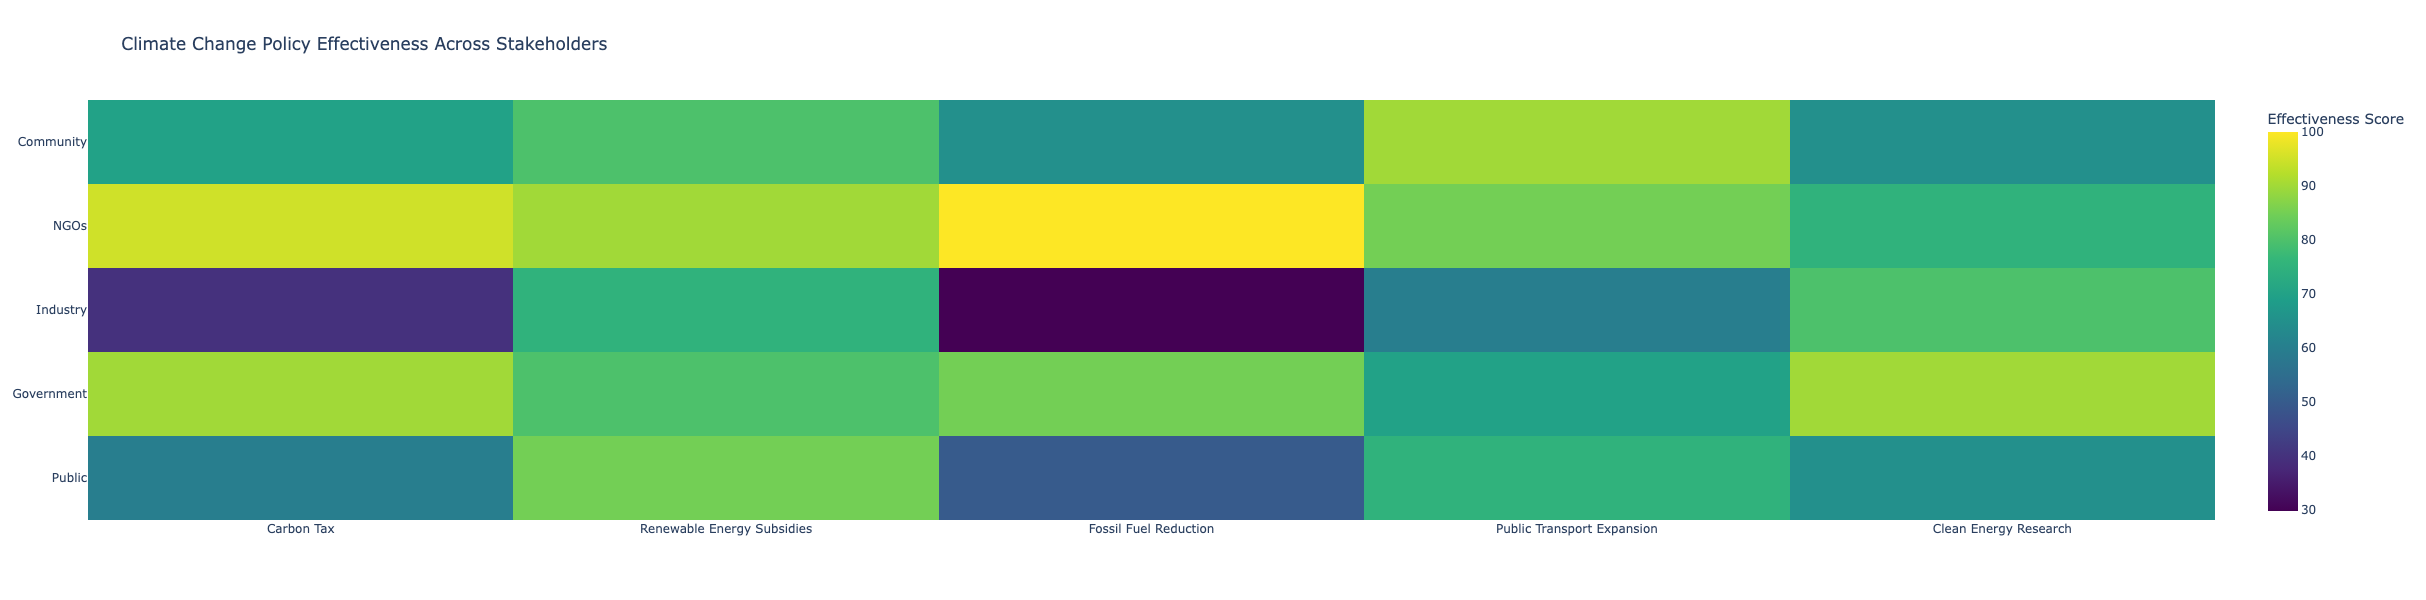

In [371]:
import plotly.graph_objects as go

# Data from the table
policies = ['Carbon Tax', 'Renewable Energy Subsidies', 'Fossil Fuel Reduction', 'Public Transport Expansion', 'Clean Energy Research']
stakeholders = ['Public', 'Government', 'Industry', 'NGOs', 'Community']

scores = [
    [60, 85, 50, 75, 65],  # Public
    [90, 80, 85, 70, 90],  # Government
    [40, 75, 30, 60, 80],  # Industry
    [95, 90, 100, 85, 75], # NGOs
    [70, 80, 65, 90, 65]   # Community
]

# Creating Heatmap
heatmap = go.Figure(data=go.Heatmap(
    z=scores,
    x=policies,
    y=stakeholders,
    colorscale='Viridis',  # Or any other colorscale you'd prefer
    colorbar=dict(title='Effectiveness Score')
))

# Customize layout
heatmap.update_layout(
    title='Climate Change Policy Effectiveness Across Stakeholders',
    xaxis_nticks=36,
    yaxis_nticks=5,
    height=600,
    width=800
)

# Show heatmap
heatmap.show()


In [3]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


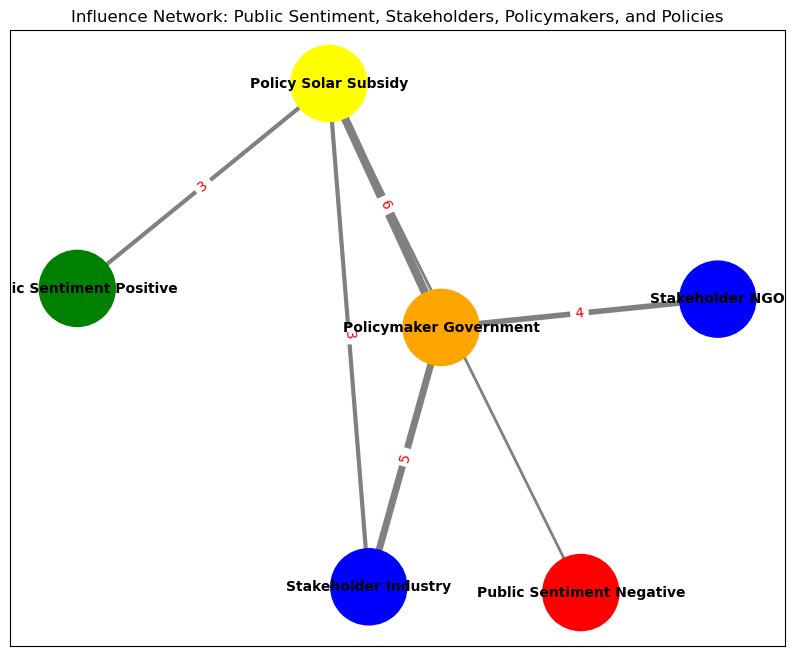

In [11]:
import networkx as nx

# Sample Nodes (with categories)
nodes = [
    ('Public Sentiment Positive', {'category': 'Sentiment'}),
    ('Public Sentiment Negative', {'category': 'Sentiment'}),
    ('Stakeholder NGO', {'category': 'Stakeholder'}),
    ('Stakeholder Industry', {'category': 'Stakeholder'}),
    ('Policymaker Government', {'category': 'Policymaker'}),
    ('Policy Solar Subsidy', {'category': 'Policy'})
]

# Sample Edges (with weights representing influence strength)
edges = [
    ('Public Sentiment Positive', 'Policy Solar Subsidy', 3),   # Positive sentiment supports the policy
    ('Public Sentiment Negative', 'Policy Solar Subsidy', 2),   # Negative sentiment opposes the policy
    ('Stakeholder NGO', 'Policymaker Government', 4),          # NGO lobbies the government
    ('Stakeholder Industry', 'Policymaker Government', 5),     # Industry influences the government
    ('Stakeholder Industry', 'Policy Solar Subsidy', 3),       # Industry directly influences the policy
    ('Policymaker Government', 'Policy Solar Subsidy', 6),     # Government decides on the policy
]




# Create a directed graph
G = nx.DiGraph()

# Add nodes with categories
for node, data in nodes:
    G.add_node(node, **data)

# Add edges with weights
for source, target, weight in edges:
    G.add_edge(source, target, weight=weight)

# Set up color mapping for nodes based on categories
color_map = []
for node in G.nodes(data=True):
    if node[1]['category'] == 'Sentiment':
        color_map.append('green' if 'Positive' in node[0] else 'red')
    elif node[1]['category'] == 'Stakeholder':
        color_map.append('blue')
    elif node[1]['category'] == 'Policymaker':
        color_map.append('orange')
    else:
        color_map.append('yellow')

# Set up edge thickness based on weights
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Layout for better visualization
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=3000)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='red')

plt.title('Influence Network: Public Sentiment, Stakeholders, Policymakers, and Policies')
plt.show()

In [34]:

erka_data

,Country,Year,Percentage
0,Japan,2000,0.3820
1,Japan,2005,0.3433
2,Japan,2010,0.3552
3,Japan,2015,0.1540
4,Japan,2020,0.2334
5,Japan,2023,0.2970
6,Japan,2035,1.0000
7,Japan,2040,1.0000
8,Australia,2000,0.0809
9,Australia,2005,0.0897


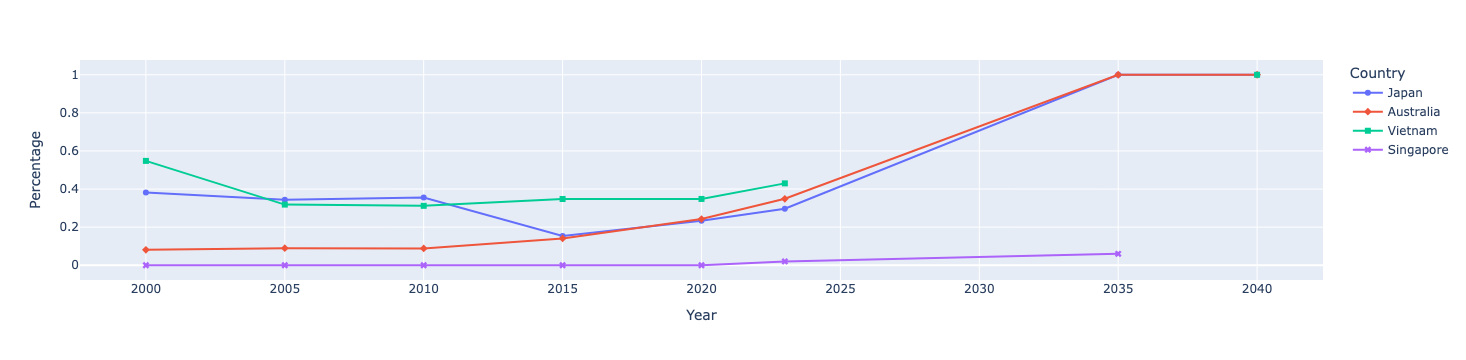

In [42]:
# Import the numpy library
import numpy as np

# Define the dataset
x = np.array([1,3,5,7,8,9, 10, 15])
y = np.array([10, 20, 30, 40, 50, 60, 70, 80])


In [43]:
def Pearson_correlation(X,Y):
	if len(X)==len(Y):
		Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
		Sum_x_squared = sum((X-X.mean())**2)
		Sum_y_squared = sum((Y-Y.mean())**2)	 
		corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
	return corr
			
print(Pearson_correlation(x,y)) 
print(Pearson_correlation(x,x))


0.974894414261588
1.0


In [44]:
print(np.corrcoef(x, y))


[[1.         0.97489441]
 [0.97489441 1.        ]]


In [45]:
import pandas as pd
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt


In [46]:
# Load the dataset with frame
df = load_diabetes(as_frame=True)
# conver into pandas dataframe
df = df.frame
# Print first 5 rows
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
